<img align="left" width="30%" style="padding-right:10px;" src="Images/Ccom.png">

___
# Review of Linear Algebra

Text:
David E. Wells, Kresho Frankich, 1994

Jupyter Notebook Implementation: Semme J. Dijkstra, 2022

<a href="https://teams.microsoft.com/l/team/19%3auL2OnH3RSfCWwU2Fd3VYGLT_03BYOfA3KB_OBp10CIY1%40thread.tacv2/conversations?groupId=5c11a428-14b6-429d-b7f5-a61ebc0a440b&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com\"></a><br><br> 

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from my_code.plottransform import plottransform
from my_code.latex_output import display_matrix
placeholder = np.asarray([])
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

# LaTex<br>

This is a [Jupyter](https://jupyter.org/) notebook in which heavy use of [LaTex](https://www.latex-project.org/) is made. LaTex is *\"a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents.\"* according to [the Latex project](https://www.latex-project.org/)

Latex allows the creation of macros and other type-setting methods of convenience. This particular Markdown cell you are reading is used for the definition of new LaTex operators and commands, but they are hidden from view. If you are interested: double click on this cell to enter its edit mode and you will be able see how they are implemented.

<div hidden>
$\usepackage{amsmath,amssymb}$

$\DeclareRobustCommand{\bbone}{\text{\usefont{U}{bbold}{m}{n}1}}$

$\DeclareMathOperator{\EX}{\mathbb{E}}% expected value$

$\DeclareMathOperator{\res}{\vec{r}}$

$\DeclareMathOperator{\mf}{\mu_{1}\sigma_{2}^{2}+\mu_{2}\sigma_{1}^{2}\over{\sigma_{1}^{2} + \sigma_{2}^{2}}}$
    
$\DeclareMathOperator{\sf}{{\sigma_{1}^{2}\sigma_{2}^{2}}\over{\sigma_{1}^{2}+\sigma_{2}^{2}}}$
    
$\newcommand{\ex}[1]{\mathbb{E}\{#1\}}$
    
$\newcommand{\dev}[1]{\mathbb{E}\{#1^o_i - \mathbb{E}\{#1\}\}}$
    
$\newcommand{\cov}[1]{\mathbb{E}\{(#1^o_i - \mathbb{E}\{#1\})(#1 - \mathbb{E}\{#1\})^T\}}$
    
$\newcommand{\m}[1]{\mathbf{#1}}$

$\newcommand{\col}[2]{\begin{pmatrix}#1 \\ #2 \end{pmatrix}}$
    
</div>

___
## 4.0 Introduction to Transforms and Python

Note that `matplotlib` has a `transforms` module that implements most commonly used transforms. since this module is specifically aimed at learning about the transforms we will not use the `matplotlib` functionality by default. However, we will include `matplotlib` examples as they are much more efficient. Even more efficiency may be gained by using code that specifically makes use of your GPU, this may be done with modules such as `pygame` and can gain you significant performance benefits if so required. One of the goals of these notebooks is then to give you the foundations required to understand the functionality of highly optimized transformations algorithms.

Before we go much further let's look at the code example below. For this code example we will define $n$ vertices $\m{v}_i,i\in \mathopen[0\dots n\mathclose)$ representing a simple boat shape and capture them as a polygon in matrix $\m{B}$ represented by variable B:

$$\m{v}_1=\col{-2}{-6}, \m{v}_2=\col{-2}{-4}, \m{v}_3=\col{0}{6}, \m{v}_4=\col{2}{4}, \m{v}_5=\col{2}{-6}$$

$$\m{B} = \left(\begin{array}{c|c|c|c|c}\m{v}_1&\m{v}_2&\m{v}_3&\m{v}_4&\m{v}_5\end{array}\right) = \begin{pmatrix}-2&-2&0&2&2\\-6&4&6&4&-6\end{pmatrix}$$

Matrix B holds a polygon defining a boat shape


<IPython.core.display.Math object>

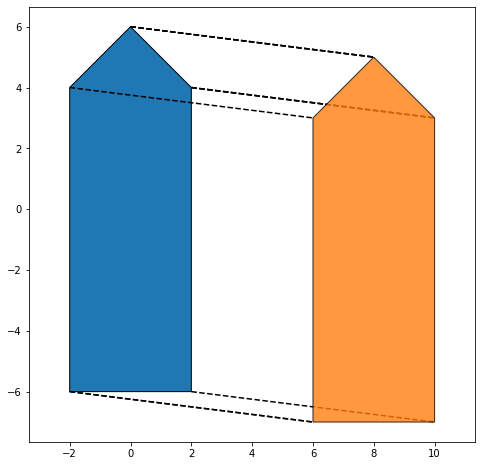

In [71]:
B = np.asarray([[-2, -2, 0, 2, 2],[-6, 4, 6, 4, -6]])
t =  np.asarray([[8],[-1]])
Bt = B + t
print('Matrix B holds a polygon defining a boat shape')
display_matrix(B)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
for i in enumerate(B[0,:]):
    plt.plot([B[0,i], Bt[0,i]],[B[1,i],Bt[1,i]],'k--',zorder=1)
    
plt.fill(Bt[0,:],Bt[1,:],'C1', ec='k', alpha=.8,zorder=2)
plt.show()

What all happened here?

    B = np.asarray([[-2, -2, 0, 2, 2],[-6, 4, 6, 4, -6]])
    
Creates a `numpy` array defining the matrix $\m{B}$ that holds a polygon of vertices in the form of the top view of a, admittedly, simple boat (shown in blue in the plot). Note that it would be more 'pythonesque' to name the matrix `B` `boat` instead, as it is more descriptive. However, since the purpose here is to illuminate principles of linear algebra we will follow the common usage of using a single capital letter, possibly augmented by a lower case specifier, as the name of a matrix. The vertices of the matrix are then given by the columns of matrix `B`, where the row 0 element defines the 0-axis (horizontal) position, and the row 1 element defines the 1-axis (vertical) position.

    t =  np.asarray([[8],[-1]])
    
Creates a column vector with the elements `8` and `-1`

    Bt = B + t
    
This is the statement that really warrants the step-by-step explanation; what happens here is not part of traditional linear algebra, but is a very useful addition for when you program - the process is called **implicit expansion** and allows you to write cleaner looking code. In linear algebra there is a mismatch in dimensions in the expression written above. Python recognizes this and replaces the vector $\m{t}$ represented by the variable `t` by the matrix $[\m{t, t, ... t}]$ matching the number of columns in `B` and thus resulting in the addition of the vector `t` to every vertex contained within `B`. Thus matrix `Bt` is matrix `B` transformed by pure translation vector `t` (you'll learn what a pure translation is next).

    print('Matrix B holds a polygon defining a boat shape')
    display_matrix(B)

This just lets the user know the numerical contents of `B` in an appropriate format using LaTeX.

    plt.figure(figsize=(8, 8))

This creates the plot canvas

    plt.axis('equal')
    
This equals the scaling of the units on the plot axes (1 unit on the 0-axis matches in size to 1 unit on the 1-axis).

    plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
    
This plots the matrix `B` as a filled polygon, using row 0 elements for the 0-axis coordinates, row 1 elements for the 1-axis, the first color in the color cycle C0, a black outline 'k', and puts the `zorder` at 0 i.e., in the background.

    for i, x in enumerate(B[0,:]):
        plt.plot([B[0,i], Bt[0,i]],[B[1,i],Bt[1,i]],'k--',zorder=1)
        
This plots black dotted connecting lines from all polygon vertices `i` contained in B to its transformed vertices in `Bt`. Since `zorder=1` the vertices are drawn over the previously drawn polygon.

    plt.fill(Bt[0,:],Bt[1,:], alpha=.8,zorder=2)
    
This plots the transformed matrix `Bt` in the second color in the color cycle (C1), and a black outline ('k') over all previously drawn shapes. Those still are visible because the polygon is made transparent by setting the value `alpha=.8`

    plt.show()
    
This forces the plot to be shown on the screen.

### 4.0 Self study exercise 1

    a) Add at least 4 vertices to the boat matrix B
    b) Create a different vector t
    c) Perform a pure translation of B using t
    
In the mycode folder you will find the file plottransform.py containing the function `plottransform` that takes the arguments B and Bt.

    d) Update function plottransform so that it reproduces the plot produced by the code cell above (hint, a simple copy and paste operation should achieve your goal)

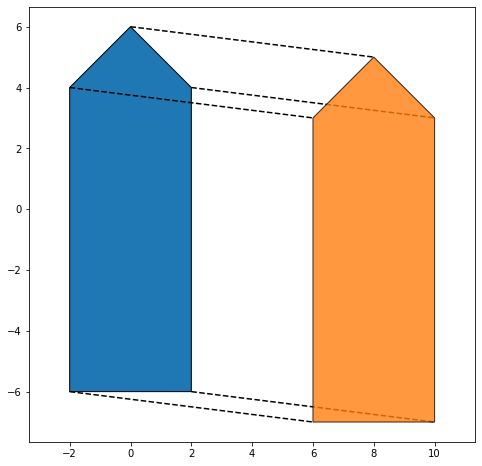

In [72]:
### 4.0 Self study exercise 1

# B = np.asarray([])
# t = np.asarray([])
# Bt = placeholder
# fg = plt.figure(figsize=(8, 8))
# plottransform(B,Bt)
# plt.show()

B = np.asarray([[-2, -2, 0, 2, 2],[-6, 4, 6, 4, -6]])
t =  np.asarray([[8],[-1]])
Bt = B + t
fg = plt.figure(figsize=(8, 8));
plottransform(B,Bt)
plt.show()